In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ft_testfunction import local_xD
from freeze_thaw import FreezeThaw, init_configs,update_configs

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


C:\Users\Amega\AppData\Local\Temp\ipykernel_14112\2734582599.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[0].hlines(mean_prediction[int(new_config*100-100)],1,100,colors='r')
C:\Users\Amega\AppData\Local\Temp\ipykernel_14112\2734582599.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[0].hlines(mean_prediction[int(new_config*100-100)]+1.96*std_prediction[int(new_config*100-100)],1,100,colors='g')
C:\Users\Amega\AppData\Local\Temp\ipykernel_14112\2734582599.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array

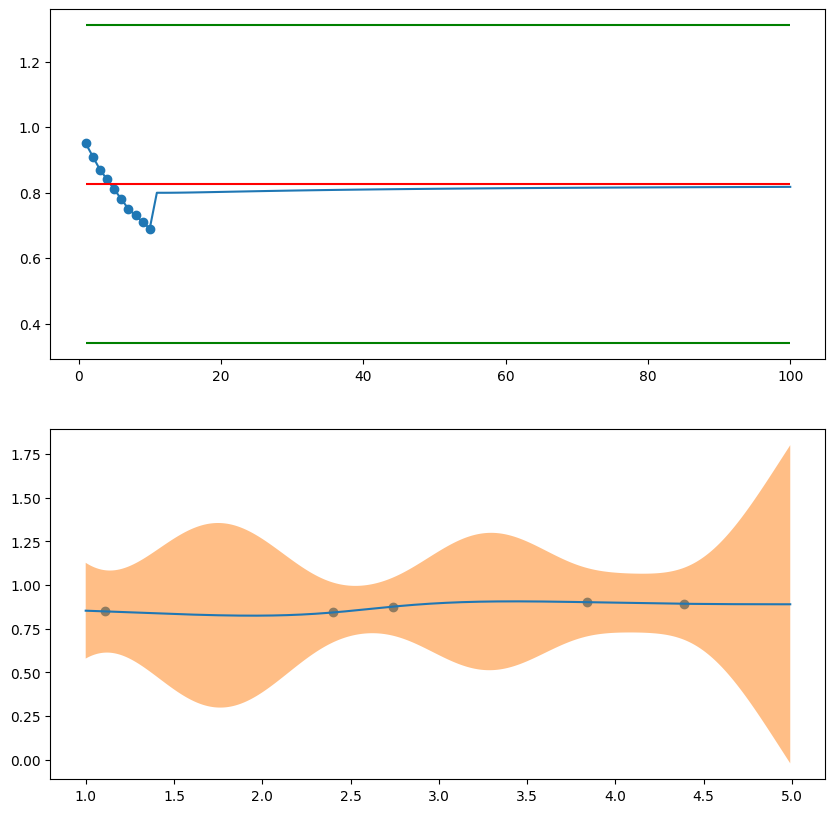

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


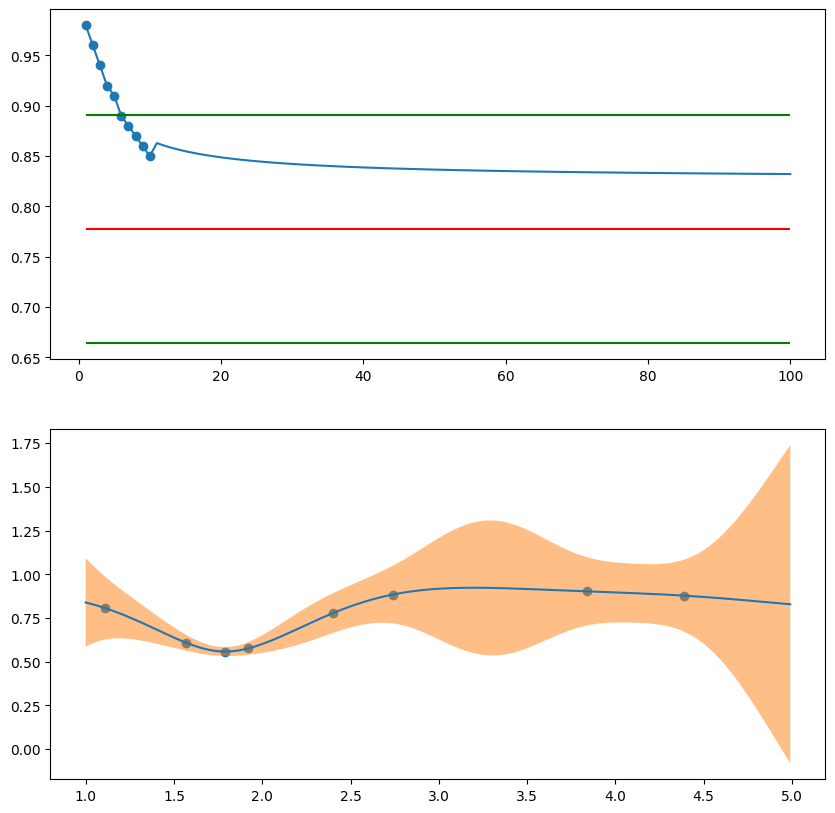

{'params': {'HP1': (1.8080808080808082,)}}


In [8]:
N_INIT_CONFIGS=5 # number of random initializations for the optimization
N_INIT_EPOCHS=3 # number of epochs trained for initial configs
# INFERRED_MEAN = 0. # inferred mean of the global GP
bounds={'HP1':(1.,5.)}#,'HP2':(1.,5.)}
local_function=local_xD



l,d=init_configs(local_function,bounds,N_INIT_CONFIGS,N_INIT_EPOCHS)
# for k,e in d.items():
#     print(k,e)

for i in range(5):
    ft=FreezeThaw(bounds,l,d,noise=0.1)
    new_config,new_epochs=ft.iterate(pred_epoch=10)
    # print(new_config)
    # print(new_epochs)
    l,d=update_configs(local_function,l,d,new_config,new_epochs)
    # for k,e in d.items():
    #     print(k,e[0])
    if i%4==0:
        config_space=np.linspace(1,5,400,endpoint=False).reshape(-1,1)
        # print(ft.observed_configs_list)
        # print(config_space)
        # print(np.append(config_space,ft.observed_configs_list))
        # print(new_config)
        mean_local,std_local=ft.predict_local(new_config,epochs=np.linspace(1,100,100))
        std_local=np.diag(std_local)
        # print(mean_local)
        # print(std_local)

        mean_prediction,std_prediction=ft.predict_global(np.append(config_space,ft.observed_configs_list).reshape(-1,1))

        fig, ax = plt.subplots(2,figsize=(10,10))
        ax[0].plot(np.linspace(1,100,100), mean_local, label="Mean prediction")
        # ax[0].fill_between(
        #     np.linspace(1,100,100).ravel(),
        #     mean_local - 1.96 * std_local,
        #     mean_local + 1.96 * std_local,
        #     alpha=0.5)
        ax[0].scatter(ft.observed_configs_dicts['_'.join([str(c) for c in new_config])][0], ft.observed_configs_dicts['_'.join([str(c) for c in new_config])][1], label="Observations")
        # print(ft.predict_global(ft.observed_configs_list))
        print(ft.observed_configs_dicts['_'.join([str(c) for c in new_config])][0])
        ax[0].hlines(mean_prediction[int(new_config*100-100)],1,100,colors='r')
        ax[0].hlines(mean_prediction[int(new_config*100-100)]+1.96*std_prediction[int(new_config*100-100)],1,100,colors='g')
        ax[0].hlines(mean_prediction[int(new_config*100-100)]-1.96*std_prediction[int(new_config*100-100)],1,100,colors='g')


        ax[1].scatter(ft.observed_configs_list, mean_prediction[400:], label="Observations")
        ax[1].plot(config_space, mean_prediction[:400], label="Mean prediction")
        ax[1].fill_between(
            config_space.ravel(),
            mean_prediction[:400] - 1.96 * std_prediction[:400],
            mean_prediction[:400] + 1.96 * std_prediction[:400],
            alpha=0.5)
        plt.show()
        plt.close()
    import itertools
num_steps=100
param_values = [list(np.linspace(lower, upper, num_steps)) for lower, upper in bounds.values()]
entire_config_space = list(itertools.product(*param_values))
mean_prediction,_std_prediction=ft.predict_global(entire_config_space)
best_config=entire_config_space[np.argmin(mean_prediction)]
best_config_dict={}
for key in bounds:
    best_config_dict[key]=best_config
print({"params":best_config_dict})
